In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Parachute Equation


$$ f(c) = \frac{mg}{c}(1- e^{-\frac{ct}{m}})$$

$$ 0=-\frac{ct}{m} $$

In [2]:
def parachute_equation(
        c: float,
        m: float,
        t: float,
        v: float,
        g:float = 9.81
):
    return (m*g/c)*(1-np.e ** (-c*t/m)) - v
data = dict(
m = 68.1,
t = 10.0,
v = 40.0,
g = 9.81,
)
c_sym = sp.Symbol('c')
parachute_equation_ = lambda c: parachute_equation(**data, c=c)

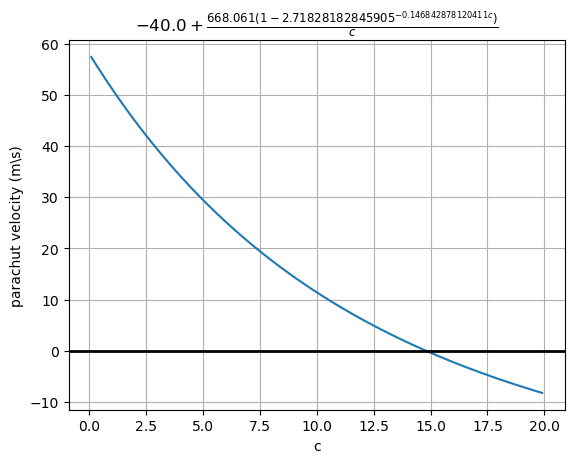

In [3]:
plt.plot(np.arange(0.1, 20, 0.1), parachute_equation_(np.arange(0.1, 20, 0.1)))
plt.axhline(y=0, color='k', linewidth=2.0)  # 'k' is black, linewidth controls thickness
plt.xlabel('c')
plt.ylabel('parachut velocity (m\\s)')
plt.title(f'${sp.latex(parachute_equation_(c_sym))}$')
plt.grid()

# Newton Rasphin method

In [4]:
from FindRoots.OpenMethods.NewtonRaphsonMethod import NewtonRaphsonMethod

newton_raphson_solver = NewtonRaphsonMethod(
    function=parachute_equation_,
    t0=1,
)
newton_raphson_solver_df = newton_raphson_solver.run()

2025-03-03 20:58:15,272 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:29 - f(t) = -40.0 + 668.061*(1 - 1/2.71828182845905**(0.146842878120411*t))/t
2025-03-03 20:58:15,290 - NewtonRaphsonMethod - INFO - NewtonRaphsonMethod.py:__post_init__:32 - f'(t) = -668.061*(1 - 1/2.71828182845905**(0.146842878120411*t))/t**2 + 98.1/(2.71828182845905**(0.146842878120411*t)*t)
2025-03-03 20:58:15,291 - NewtonRaphsonMethod - INFO - Numerical.py:run:121 - Starting NewtonRaphsonMethod
2025-03-03 20:58:15,292 - NewtonRaphsonMethod - INFO - Numerical.py:initialize:67 - Initial state:{'t': 1, 'f': 51.237337654989446, 'df_dt': -6.53489090829187}
2025-03-03 20:58:15,293 - utils.ExceptionTools - WARNING - ExceptionTools.py:IgnoreException:13 - Ignoring exception [TypeError]
2025-03-03 20:58:15,294 - utils.ExceptionTools - WARNING - ExceptionTools.py:IgnoreException:13 - Ignoring exception [TypeError]
2025-03-03 20:58:15,294 - NewtonRaphsonMethod - INFO - Numerical.py:run:126 - Iteration

In [5]:
newton_raphson_solver_df

,t,f,df_dt
0,1,51.237338,-6.53489090829187
1,8.84058041274666,51.237338,-6.53489090829187
2,13.5308762877947,14.9353967648316,-3.18431867897428
3,14.7391256368931,2.60313561916964,-2.15446887772978
4,14.8009855631214,0.121111046595125,-1.95782720703767
5,14.8011359441061,0.000292996847356619,-1.94836367099801
6,14.8011359449913,1.72467196080106e-9,-1.94834073369326
7,14.8011359449913,-7.10542735760100e-15,-1.94834073355824
8,14.8011359449913,7.10542735760100e-15,-1.94834073355824
9,14.8011359449913,-7.10542735760100e-15,-1.94834073355824


# Bisection Method

In [6]:
from FindRoots.BracketingMethods.BiSectionMethod import BiSectionMethod

bisection_solver = BiSectionMethod.initial_range(
    initial_range=(5, 20),
    function=parachute_equation_,
)
bisection_solver_df = bisection_solver.run()

2025-03-03 20:58:15,442 - BiSectionMethod - INFO - Numerical.py:run:121 - Starting BiSectionMethod
2025-03-03 20:58:15,442 - BiSectionMethod - INFO - Numerical.py:initialize:67 - Initial state:{'t_lower': 5, 't_upper': 20, 't_root': 12.5, 'f_lower': 29.49406868891994, 'f_root': 4.918926487237513, 'f_upper': -8.368384465361824, 'bracket_size': 15, 'log': 'Initial state'}
2025-03-03 20:58:15,443 - BiSectionMethod - INFO - Numerical.py:run:126 - Iteration 1 completed
Stop condition [StopIfZero  ] NOT met: Variable f_root:4.919e+00 != 0.000e+00 (diff: 4.919e+00)
Stop condition [StopIfZero  ] NOT met: Variable bracket_size:1.500e+01 != 0.000e+00 (diff: 1.500e+01)
Stop condition [StopIfNaN   ] NOT met: No NaN values found
2025-03-03 20:58:15,443 - FindRoots.BracketingMethods.BiSectionMethod - INFO - BiSectionMethod.py:step:91 - Root is in upper half of interval
2025-03-03 20:58:15,444 - FindRoots.BracketingMethods.BiSectionMethod - INFO - BiSectionMethod.py:step:92 - f(1.625e+01) = 4.919e+00

In [7]:
bisection_solver_df

,t_lower,t_upper,t_root,f_lower,f_root,f_upper,bracket_size,log
0,5.000000,20.000000,12.500000,29.494069,4.918926e+00,-8.368384e+00,1.500000e+01,Initial state
1,12.500000,20.000000,16.250000,29.494069,4.918926e+00,-8.368384e+00,7.500000e+00,Root is in upper half of interval
2,12.500000,16.250000,14.375000,4.918926,-2.669937e+00,-8.368384e+00,3.750000e+00,Root is in lower half of interval
3,14.375000,16.250000,15.312500,4.918926,8.442980e-01,-2.669937e+00,1.875000e+00,Root is in upper half of interval
4,14.375000,15.312500,14.843750,0.844298,-9.766912e-01,-2.669937e+00,9.375000e-01,Root is in lower half of interval
5,14.375000,14.843750,14.609375,0.844298,-8.288840e-02,-9.766912e-01,4.687500e-01,Root is in lower half of interval
6,14.609375,14.843750,14.726562,0.844298,3.764373e-01,-8.288840e-02,2.343750e-01,Root is in upper half of interval
7,14.726562,14.843750,14.785156,0.376437,1.457196e-01,-8.288840e-02,1.171875e-01,Root is in upper half of interval
8,14.785156,14.843750,14.814453,0.145720,3.115337e-02,-8.288840e-02,5.859375e-02,Root is in upper half of interval
9,14.785156,14.814453,14.799805,0.031153,-2.593288e-02,-8.288840e-02,2.929688e-02,Root is in lower half of interval


# THE SECANT METHOD

In [8]:
from FindRoots.OpenMethods.SecantMethod import SecantMethod

secant_method_solver = SecantMethod(
    function=parachute_equation_,
    t0=0.1,
    t1=0.2,
)
clear_output()
secant_method_solver_df = secant_method_solver.run()

2025-03-03 20:58:15,662 - SecantMethod - INFO - Numerical.py:run:121 - Starting SecantMethod
2025-03-03 20:58:15,662 - SecantMethod - INFO - Numerical.py:initialize:67 - Initial state:{'t': 0.2, 't_mn1': 0.1, 'f': 56.67347052263112, 'f_mn1': 56.67347052263112, 'df_dt': -7.097777785020014}
2025-03-03 20:58:15,663 - SecantMethod - INFO - Numerical.py:run:126 - Iteration 1 completed
Stop condition [StopIfZero  ] NOT met: Variable f:5.667e+01 != 0.000e+00 (diff: 5.667e+01)
Stop condition [StopIfZero  ] NOT met: Variable df_dt:-7.098e+00 != 0.000e+00 (diff: 7.098e+00)
Stop condition [StopIfNaN   ] NOT met: No NaN values found
2025-03-03 20:58:15,664 - SecantMethod - INFO - Numerical.py:run:131 - State: 
{'t': 8.18467805546709, 't_mn1': 0.2, 'f': 17.08460887362456, 'f_mn1': 56.67347052263112, 'df_dt': -7.097777785020014}

2025-03-03 20:58:15,664 - SecantMethod - INFO - Numerical.py:run:126 - Iteration 2 completed
Stop condition [StopIfZero  ] NOT met: Variable f:1.708e+01 != 0.000e+00 (diff:

In [9]:
secant_method_solver_df

,t,t_mn1,f,f_mn1,df_dt
0,0.200000,0.100000,5.667347e+01,5.667347e+01,-7.097778
1,8.184678,0.200000,1.708461e+01,5.667347e+01,-7.097778
2,11.630473,8.184678,7.029197e+00,1.708461e+01,-4.958104
3,14.039243,11.630473,1.529799e+00,7.029197e+00,-2.918169
4,14.709304,14.039243,1.795643e-01,1.529799e+00,-2.283073
5,14.798414,14.709304,5.303669e-03,1.795643e-01,-2.015091
6,14.801126,14.798414,1.904939e-05,5.303669e-03,-1.955573
7,14.801136,14.801126,2.029495e-09,1.904939e-05,-1.948549
8,14.801136,14.801136,7.105427e-15,2.029495e-09,-1.948341
9,14.801136,14.801136,0.000000e+00,7.105427e-15,-1.948335


In [14]:
from FindRoots.OpenMethods.FixPointMethod import FixPointMethod

fixpoint_method_solver = FixPointMethod(
    function=lambda x: np.sin(np.sqrt(x)),
    t0=1,
    relaxation_factor=1,
)
fixpoint_method_solver_df = fixpoint_method_solver.run()

2025-03-03 20:59:25,026 - FixPointMethod - INFO - Numerical.py:run:121 - Starting FixPointMethod
2025-03-03 20:59:25,031 - FixPointMethod - INFO - Numerical.py:initialize:67 - Initial state:{'t': 1, 'f': np.float64(0.8414709848078965)}
2025-03-03 20:59:25,034 - FixPointMethod - INFO - Numerical.py:run:126 - Iteration 1 completed
Stop condition [StopAtPlateau] NOT met: Not enough iterations to determine plateau
Stop condition [StopIfNaN   ] NOT met: No NaN values found
2025-03-03 20:59:25,037 - FindRoots.OpenMethods.FixPointMethod - INFO - FixPointMethod.py:step:41 - t_root = 8.415e-01
2025-03-03 20:59:25,040 - FixPointMethod - INFO - Numerical.py:run:131 - State: 
{'t': np.float64(0.8414709848078965), 'f': np.float64(0.7939735107247134)}

2025-03-03 20:59:25,044 - FixPointMethod - INFO - Numerical.py:run:126 - Iteration 2 completed
Stop condition [StopAtPlateau] NOT met: Change detected in 't': 1 → 0.8414709848078965, difference: 0.1585290151921035
Stop condition [StopIfNaN   ] NOT met

In [15]:
fixpoint_method_solver_df

,t,f
0,1.000000,0.841471
1,0.841471,0.793974
2,0.793974,0.777733
3,0.777733,0.771943
4,0.771943,0.769848
5,0.769848,0.769086
6,0.769086,0.768808
7,0.768808,0.768707
8,0.768707,0.768670
9,0.768670,0.768657


In [12]:
(lambda x: np.sin(np.sqrt(x))-x)(0.768549)

np.float64(6.342592930108637e-05)